In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# files.upload()

Saving __init__.py to __init__ (1).py
Saving argparser.py to argparser (1).py
Saving helper.py to helper (1).py
Saving mnist_reader.py to mnist_reader (1).py


{'__init__ (1).py': b'',
 'argparser (1).py': b"import sys\nfrom collections import defaultdict\n\nfrom typing import Dict, Any, Union\n\n\ndef parse_arg(v: str) -> Union[str, int, float, bool, None]:\n    try:\n        v = int(v)  # parse int parameter\n    except ValueError:\n        try:\n            v = float(v)  # parse float parameter\n        except ValueError:\n            if len(v) == 0:\n                # ignore it when the parameter is empty\n                v = None\n            elif v.lower() == 'true':  # parse boolean parameter\n                v = True\n            elif v.lower() == 'false':\n                v = False\n    return v\n\n\ndef get_args_request(args: Dict[str, str]) -> Dict[str, Any]:\n    return {k: parse_arg(v) for k, v in args.items()}\n\n\ndef get_args_cli() -> Dict[str, Any]:\n    d = defaultdict(list)\n    if sys.argv[1:]:\n        for k, v in ((k.lstrip('-'), v) for k, v in (a.split('=') for a in sys.argv[1:])):\n            d[k].append(v)\n        f

In [3]:
from utils import mnist_reader
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
seed = 1234
np.random.seed(seed)

In [4]:
#Documentation located at: https://github.com/zalandoresearch/fashion-mnist
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [5]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=seed, shuffle=True
)

In [ ]:
# SuperXArr = np.concatenate((X_train, X_test), axis=0)
# SuperYArr = np.concatenate((y_train, y_test))

In [6]:
print(X_train.shape)
print(y_train.shape)
print("\n")
print(X_tr.shape) #75/25 test and valid split
print(y_tr.shape)
print("\n")
print(X_val.shape)
print(y_val.shape)
print("\n")
print(X_test.shape) # just test split
print(y_test.shape)

# print(SuperXArr.shape)

print(set(y_train))

(60000, 784)
(60000,)


(45000, 784)
(45000,)


(15000, 784)
(15000,)


(10000, 784)
(10000,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
LRModel = LogisticRegression(penalty='l1', solver='liblinear')
LRModel.fit(X_tr, y_tr)




LogisticRegression(penalty='l1', solver='liblinear')

First Model Accuracy Train ACC: 0.885 Validation ACC: 0.8416


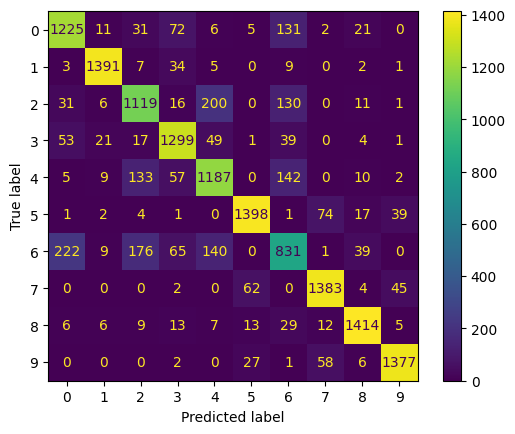

In [8]:
LRModelAccTrain = accuracy_score(LRModel.predict(X_tr),y_tr)
LRModelAccValid = accuracy_score(LRModel.predict(X_val),y_val)
print(f"First Model Accuracy Train ACC: {LRModelAccTrain} Validation ACC: {LRModelAccValid}")

# Evaluate confusion matrix using the sklearn function confusion_matrix
sklearn_cm = confusion_matrix(y_val, LRModel.predict(X_val))
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

In [ ]:
# X_train1, y_train1 = mnist_reader.load_mnist('data/fashion', kind='train')
# X_test1, y_test1 = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [ ]:
# print(X_train1.shape)
# print(y_train1.shape)

# print(X_test1.shape)
# print(y_test1.shape)

In [9]:
# penaltyList = ['l1', 'l2']
# CList = [1, 10, 100]

LRModelList = list()

In [ ]:
# %%capture HUoutput

# for potentPenalty in penaltyList:
#     print(potentPenalty)
#     for potentC in CList:
#         tempLRModel = LogisticRegression(
#             penalty=potentPenalty, solver='liblinear', C = potentC
#         )

#         tempLRModel.fit(X_tr,y_tr)

#         LRModelList.append(tempLRModel)

# print("Done training")

In [ ]:
tempLRModel0 = LogisticRegression(
            penalty='l1', solver='liblinear', C = 1
        )

tempLRModel0.fit(X_tr,y_tr)

# LRModelList.append(tempLRModel0)

In [17]:
LRModelList.append(tempLRModel0)

In [18]:
tempLRModel1 = LogisticRegression(
            penalty='l1', solver='liblinear', C = 10
        )

tempLRModel1.fit(X_tr,y_tr)

# LRModelList.append(tempLRModel1)

In [19]:
LRModelList.append(tempLRModel1)

In [20]:
tempLRModel2 = LogisticRegression(
            penalty='l1', solver='liblinear', C = 100
        )

tempLRModel2.fit(X_tr,y_tr)

# LRModelList.append(tempLRModel2)

In [21]:
LRModelList.append(tempLRModel2)

In [ ]:
tempLRModel3 = LogisticRegression(
            penalty='l2', solver='liblinear', C = 1
        )

tempLRModel3.fit(X_tr,y_tr)

#LRModelList.append(tempLRModel3)

In [ ]:
LRModelList.append(tempLRModel3)

In [ ]:
tempLRModel4 = LogisticRegression(
            penalty='l2', solver='liblinear', C = 10
        )

tempLRModel4.fit(X_tr,y_tr)

# LRModelList.append(tempLRModel4)

In [ ]:
LRModelList.append(tempLRModel4)

In [ ]:
tempLRModel5 = LogisticRegression(
            penalty='l2', solver='liblinear', C = 100
        )

tempLRModel5.fit(X_tr,y_tr)

LRModelList.append(tempLRModel5)

In [ ]:
LRModelList.append(tempLRModel5)

In [16]:
print(len(LRModelList))

1


In [ ]:
# HUoutput.show()

NameError: name 'HUoutput' is not defined

In [ ]:
for amodel in LRModelList:
    tempModTrainAcc = accuracy_score(amodel.predict(X_tr),y_tr)
    tempModTestAcc = accuracy_score(amodel.predict(X_test),y_test)

    print(f"The Train ACC: {tempModTrainAcc} Test ACC: {tempModTestAcc}")